In [1]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d halilsaglamlar/dog-cat

 97% 553M/568M [00:06<00:00, 76.4MB/s]
100% 568M/568M [00:07<00:00, 84.9MB/s]


In [3]:
!unzip dog-cat.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/train/dog/dog.1193.jpg  
  inflating: data/train/dog/dog.11930.jpg  
  inflating: data/train/dog/dog.11931.jpg  
  inflating: data/train/dog/dog.11932.jpg  
  inflating: data/train/dog/dog.11933.jpg  
  inflating: data/train/dog/dog.11934.jpg  
  inflating: data/train/dog/dog.11935.jpg  
  inflating: data/train/dog/dog.11936.jpg  
  inflating: data/train/dog/dog.11937.jpg  
  inflating: data/train/dog/dog.11938.jpg  
  inflating: data/train/dog/dog.11939.jpg  
  inflating: data/train/dog/dog.1194.jpg  
  inflating: data/train/dog/dog.11940.jpg  
  inflating: data/train/dog/dog.11941.jpg  
  inflating: data/train/dog/dog.11942.jpg  
  inflating: data/train/dog/dog.11943.jpg  
  inflating: data/train/dog/dog.11944.jpg  
  inflating: data/train/dog/dog.11945.jpg  
  inflating: data/train/dog/dog.11946.jpg  
  inflating: data/train/dog/dog.11947.jpg  
  inflating: data/train/dog/dog.11948.jpg  
  inflating: data

In [ ]:
!ls #Muestra lo que hay en la carpeta

data  dog-cat.zip  kaggle.json	sample_data


In [ ]:
!ls data

test  train  validation


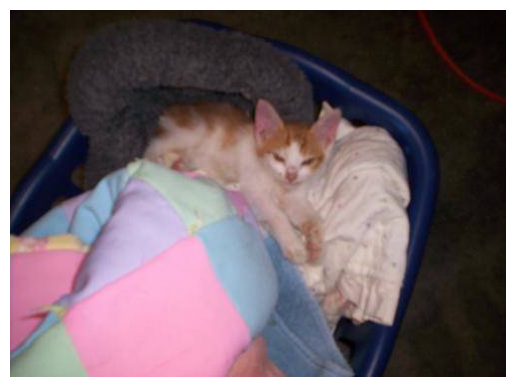

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
# Obtenemos las imagenes
ruta_imagen= "/content/data/train/cat/cat.45.jpg"
# Abrir la imagen
imagen = Image.open(ruta_imagen)
#Mostrar la imagen
plt.imshow(imagen)
plt.axis("off")
plt.show()

In [ ]:
!ls /content/data/train/cat | head -5


cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg


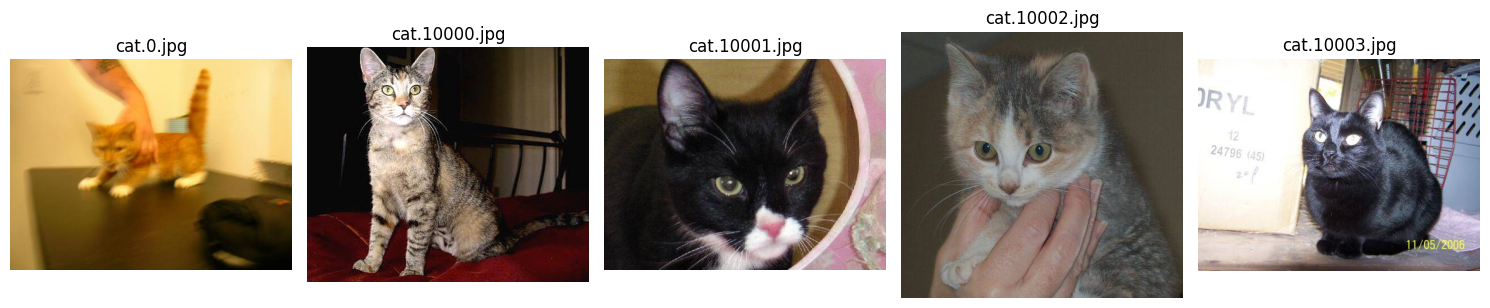

In [ ]:
#Graficamos las fotos

nuevas_imagenes=["cat.0.jpg",
"cat.10000.jpg", "cat.10001.jpg",
"cat.10002.jpg",
"cat.10003.jpg"]

plt.figure(figsize=(15,3))

for i, nueva_imagen in enumerate(nuevas_imagenes):
  imagen_ruta=f"/content/data/train/cat/{nueva_imagen}"
  imagen=Image.open(imagen_ruta)

  #COnfigurar un subplot

  plt.subplot(1,5,i+1)
  plt.imshow(imagen)
  plt.axis("off")
  plt.title(nueva_imagen)

plt.tight_layout()
plt.show()

In [ ]:
!ls /content/data/train/dog | head -5


2462.jpg
2464.jpg
2465.jpg
2466.jpg
2467.jpg


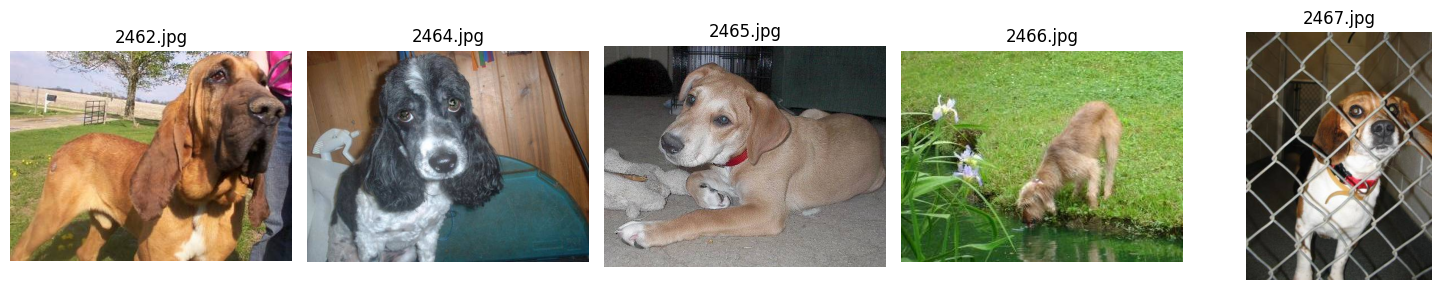

In [ ]:

nuevas_imagenes=["2462.jpg",
"2464.jpg", "2465.jpg",
"2466.jpg",
"2467.jpg"]

plt.figure(figsize=(15,3))

for i, nueva_imagen in enumerate(nuevas_imagenes):
  imagen_ruta=f"/content/data/train/dog/{nueva_imagen}"
  imagen=Image.open(imagen_ruta)

  #COnfigurar un subplot

  plt.subplot(1,5,i+1)
  plt.imshow(imagen)
  plt.axis("off")
  plt.title(nueva_imagen)

plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

In [ ]:
#Definicion de carpetas
directorio="/content/data"
test="/content/data/test"
train="/content/data/train"
validation="/content/data/validation"

In [ ]:
#Preprocesamiento de datos
data=[]
talla=100
categorias=["cat","dog"]

for categoria in categorias:
  carpeta=os.path.join(train,categoria)
  label=categorias.index(categoria)
  for imagen in os.listdir(carpeta):
    imagen_path=os.path.join(carpeta,imagen)
    imagen_array=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
    try:
      imagen_array=cv2.resize(imagen_array,(talla,talla))
      data.append([imagen_array,label])
    except Exception as e:
      print(str(e))
X_train=[]
Y_train=[]

for imagenes,labels in data:
  X_train.append(imagenes)
  Y_train.append(labels)

X_train=np.array(X_train).reshape(-1,talla,talla,1)
Y_train=np.array(Y_train)

X_train=X_train/255.0



In [ ]:
len(data)

17526

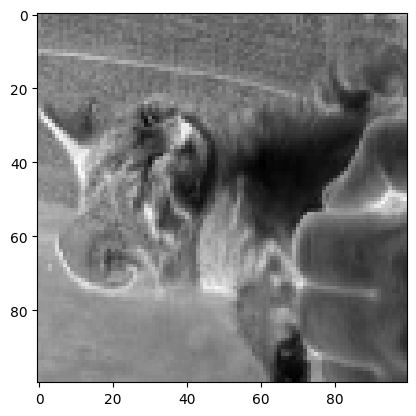

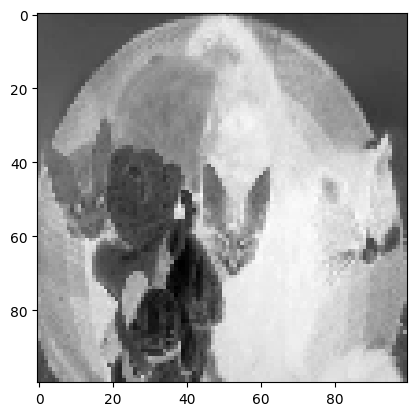

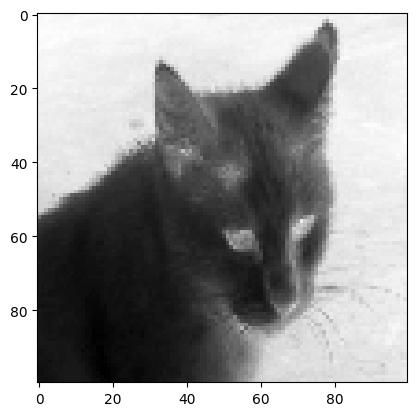

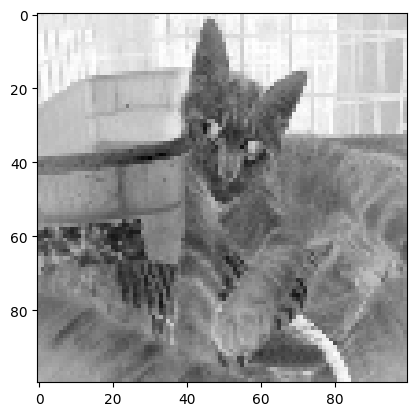

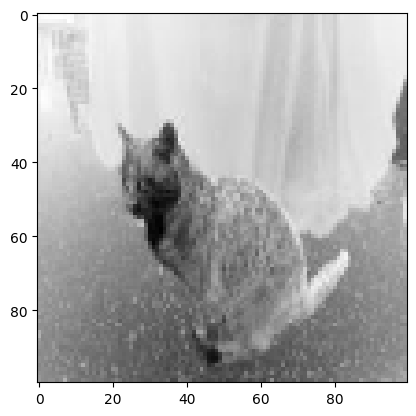

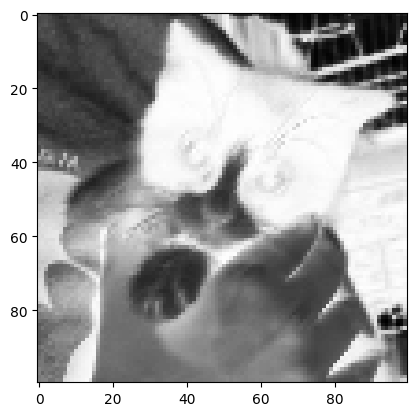

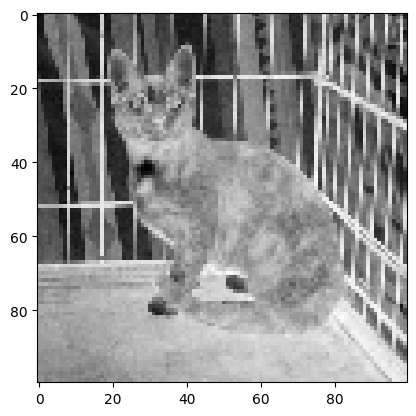

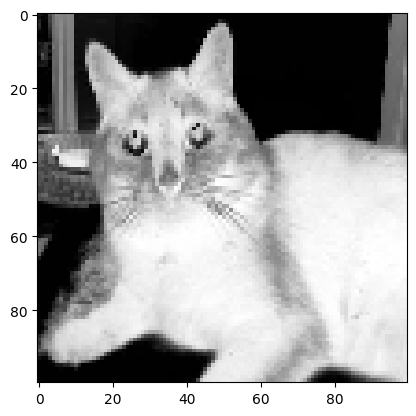

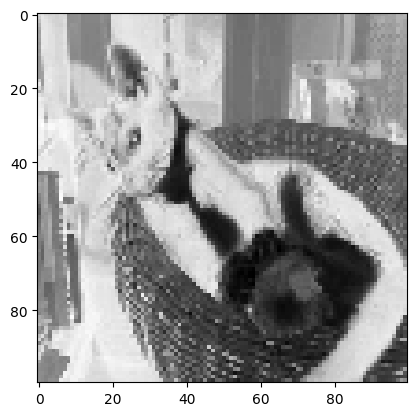

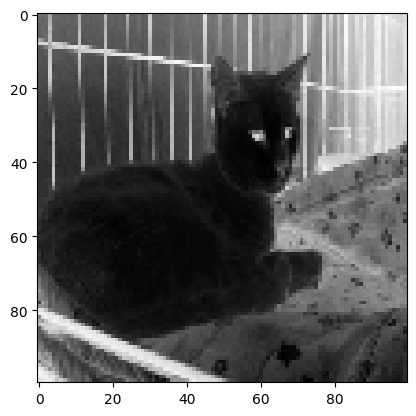

In [ ]:
for i in range(10):
  plt.imshow(data[i][0],cmap=plt.cm.binary)
  plt.show()

In [ ]:
#Entrenando a la red neuonal
modelo=tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Flatten(input_shape=(talla,talla,1)))#input
modelo.add(tf.keras.layers.Dense(128,activation="relu")) #Solo numero de 2 a la n y es inputs/Capas intermedias (hidden)
modelo.add(tf.keras.layers.Dense(2,activation="softmax")) #outputs

modelo.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
modelo.fit(X_train,Y_train, epochs=20)




Epoch 1/20
548/548 [==============================] - 6s 9ms/step - loss: 0.7132 - accuracy: 0.6691
Epoch 2/20
548/548 [==============================] - 5s 9ms/step - loss: 0.6103 - accuracy: 0.6929
Epoch 3/20
548/548 [==============================] - 5s 9ms/step - loss: 0.5850 - accuracy: 0.7089
Epoch 4/20
548/548 [==============================] - 4s 8ms/step - loss: 0.5776 - accuracy: 0.7120
Epoch 5/20
548/548 [==============================] - 4s 8ms/step - loss: 0.5717 - accuracy: 0.7120
Epoch 6/20
548/548 [==============================] - 5s 9ms/step - loss: 0.5695 - accuracy: 0.7135
Epoch 7/20
548/548 [==============================] - 4s 8ms/step - loss: 0.5671 - accuracy: 0.7132
Epoch 8/20
548/548 [==============================] - 5s 9ms/step - loss: 0.5659 - accuracy: 0.7151
Epoch 9/20
548/548 [==============================] - 4s 8ms/step - loss: 0.5649 - accuracy: 0.7148
Epoch 10/20
548/548 [==============================] - 5s 9ms/step - loss: 0.5645 - accuracy: 0.7130

In [ ]:
#Generamos la prediccion
def predecir_imagen(ruta_imagen):
  imagen_prueba=cv2.imread(ruta_imagen,cv2.IMREAD_GRAYSCALE)
  imagen_prueba=cv2.resize(imagen_prueba,(talla,talla))
  imagen_prueba=np.array(imagen_prueba).reshape(-1,talla,talla,1)
  imagen_prueba=imagen_prueba/255.0

  prediccion=modelo.predict([imagen_prueba])
  print("probabilidad gato: ", prediccion [0] [0])
  print("probabilidad perro: ", prediccion [0] [1])


In [ ]:
ruta_imagen_nueva="/images.jpeg.crdownload"
predecir_imagen(ruta_imagen_nueva)

error: ignored